## Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

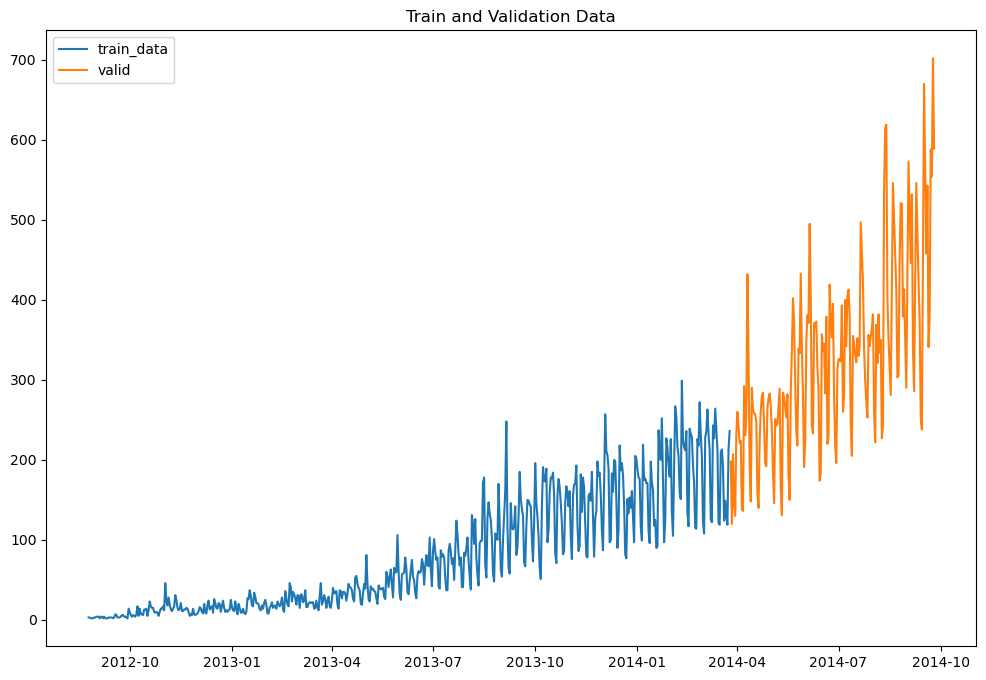

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Exponential Smoothing

### Simple Exponential Smoothing (SES)

**Purpose**: Simple Exponential Smoothing is used for forecasting data with no clear trend or seasonal pattern. It is a weighted moving average technique where more recent observations are given more weight than older observations.

**Formula**:
$$ S_t = \alpha Y_t + (1 - \alpha) S_{t-1} $$

where:
- $ S_t $ is the smoothed value at time $ t $.
- $ Y_t $ is the actual value at time $ t $.
- $ \alpha $ is the smoothing factor (0 < $ \alpha $ < 1).
- $ S_{t-1} $ is the smoothed value at time $ t-1 $.

The smoothing factor $ \alpha $ determines the weight of the most recent observation. A higher $ \alpha $ gives more weight to recent observations.



In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [9]:
model = SimpleExpSmoothing(np.asarray(train_data['count']))
model = model.fit(smoothing_level=0.7, optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [10]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [11]:
valid_data.head()

,Date,count,SES
Date,,,
2014-03-26,2014-03-26,198,221.273571
2014-03-27,2014-03-27,120,221.273571
2014-03-28,2014-03-28,207,221.273571
2014-03-29,2014-03-29,145,221.273571
2014-03-30,2014-03-30,130,221.273571


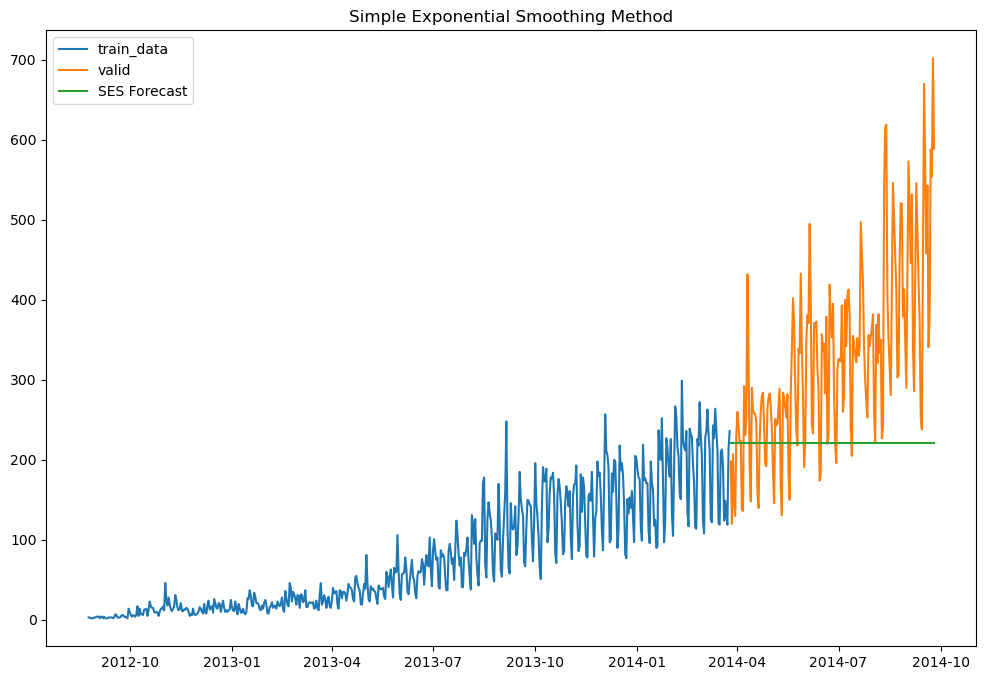

In [12]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [13]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 156.57206825628182


In [14]:
RMSE_df = pd.DataFrame([], columns=['RMSE'])
RMSE_df.loc['SES'] = rmse

In [15]:
RMSE_df

,RMSE
SES,156.572068


# Double Exponential Smoothing

### Double Exponential Smoothing (DES)

**Purpose**: Double Exponential Smoothing, also known as Holt’s Linear Trend Model, is used for data with a trend but no seasonality. It accounts for both the level and the trend of the data.

**Formulas**:
1. **Level**:
$$ L_t = \alpha Y_t + (1 - \alpha) (L_{t-1} + T_{t-1}) $$

2. **Trend**:
$$ T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} $$

3. **Forecast**:
$$ F_{t+m} = L_t + m T_t $$

where:
- $ L_t $ is the level at time $ t $.
- $ T_t $ is the trend at time $ t $.
- $ \alpha $ is the level smoothing factor (0 < $ \alpha $ < 1).
- $ \beta $ is the trend smoothing factor (0 < $ \beta $ < 1).
- $ F_{t+m} $ is the forecast for $ m $ periods ahead.

The level equation smooths the series, while the trend equation updates the trend. The forecast equation uses both the level and the trend.

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [17]:
model = ExponentialSmoothing(np.asarray(train_data['count']), trend='mul')
model = model.fit(smoothing_level=0.05) #, smoothing_slope=0.00001) # , initial_trend = 1.2) #  

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [18]:
model.params

{'smoothing_level': 0.05,
 'smoothing_trend': 0.023077478180170356,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 7.749063793659939,
 'initial_trend': 0.9735853029100362,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

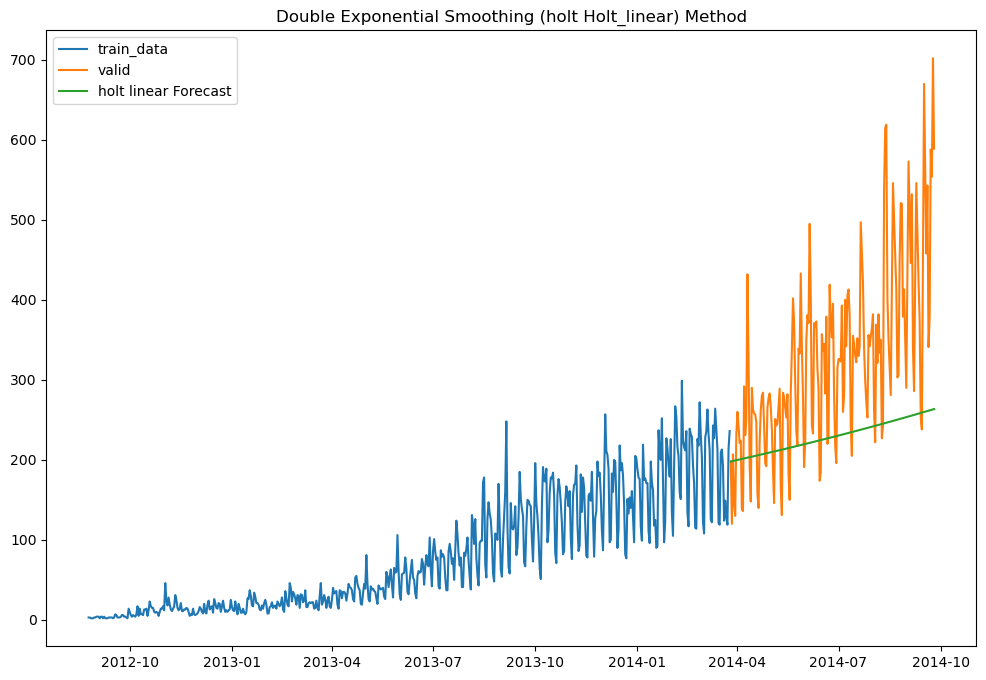

In [19]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [20]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 142.41025299660572


# Holt's Winters (aka triple exponential smoothing)

### Triple Exponential Smoothing (TES)

**Purpose**: Triple Exponential Smoothing, also known as Holt-Winters Exponential Smoothing, is used for data with both trend and seasonality. It accounts for level, trend, and seasonal components.

**Formulas**:
1. **Level**:
$$ L_t = \alpha \left(\frac{Y_t}{S_{t-L}}\right) + (1 - \alpha)(L_{t-1} + T_{t-1}) $$

2. **Trend**:
$$ T_t = \beta (L_t - L_{t-1}) + (1 - \beta) T_{t-1} $$

3. **Seasonal**:
$$ S_t = \gamma \left(\frac{Y_t}{L_t}\right) + (1 - \gamma) S_{t-L} $$

4. **Forecast**:
$$ F_{t+m} = (L_t + m T_t) S_{t-L+m} $$

where:
- $ L_t $ is the level at time $ t $.
- $ T_t $ is the trend at time $ t $.
- $ S_t $ is the seasonal component at time $ t $.
- $ \alpha $ is the level smoothing factor (0 < $ \alpha $ < 1).
- $ \beta $ is the trend smoothing factor (0 < $ \beta $ < 1).
- $ \gamma $ is the seasonal smoothing factor (0 < $ \gamma $ < 1).
- $ L $ is the length of the seasonality.
- $ F_{t+m} $ is the forecast for $ m $ periods ahead.

The level equation incorporates both the trend and the seasonal components. The trend equation updates the trend, and the seasonal equation updates the seasonality. The forecast equation uses all three components.


In [21]:
from statsmodels.tsa.api import ExponentialSmoothing

In [22]:
model = ExponentialSmoothing(np.asarray(train_data['count']) ,seasonal_periods=7 ,trend='mul', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.02, smoothing_slope=0.01, smoothing_seasonal=0.01) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [24]:
model.params

{'smoothing_level': 0.02,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': 0.01,
 'damping_trend': nan,
 'initial_level': 2.6571428571428557,
 'initial_trend': 1.0332355816226786,
 'initial_seasons': array([1.04902655, 0.84106528, 1.01188582, 1.05525042, 1.14848431,
        1.04614281, 0.84814481]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

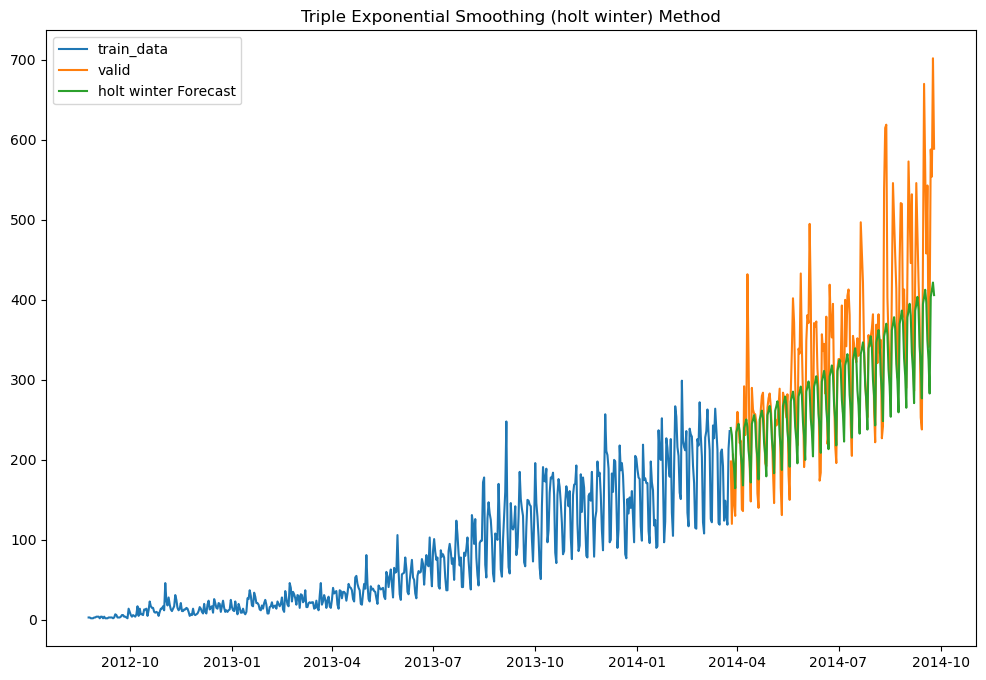

In [25]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [26]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 80.51848023726413


### Summary
- **SES**: Used for data with no trend or seasonality. It applies a single smoothing equation to the data.
- **DES**: Used for data with a trend but no seasonality. It adds a second smoothing equation to account for the trend.
- **TES**: Used for data with both trend and seasonality. It adds a third smoothing equation to account for seasonality.
